In [3]:
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    # Get the forecast office and grid information
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    # Extract the forecast URLs
    forecast_url = data['properties']['forecast']
    hourly_forecast_url = data['properties']['forecastHourly']
    
    # Get the forecast data
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    # Get hourly forecast for additional data (e.g., humidity, precipitation)
    hourly_forecast_response = requests.get(hourly_forecast_url, headers=headers)
    hourly_forecast_response.raise_for_status()
    hourly_forecast_data = hourly_forecast_response.json()
    
    return forecast_data, hourly_forecast_data

def extract_detailed_weather(forecast_data, hourly_forecast_data):
    """Extract detailed weather data from NOAA's forecast."""
    weather_details = []

    # Daily forecast details
    for daily_period in forecast_data['properties']['periods']:
        details = {
            "name": daily_period['name'],
            "start_time": daily_period['startTime'],
            "end_time": daily_period['endTime'],
            "temperature": f"{daily_period['temperature']}°{daily_period['temperatureUnit']}",
            "wind_speed": daily_period['windSpeed'],
            "wind_direction": daily_period['windDirection'],
            "forecast": daily_period['shortForecast']
        }
        weather_details.append(details)
    
    # Add extra details from the hourly data (e.g., humidity, precipitation)
    for i, hourly_period in enumerate(hourly_forecast_data['properties']['periods'][:len(weather_details)]):
        humidity = hourly_period.get('relativeHumidity', {}).get('value', 'N/A')
        precipitation = hourly_period.get('probabilityOfPrecipitation', {}).get('value', 'N/A')
        weather_details[i]["humidity"] = f"{humidity}%" if humidity != 'N/A' else "N/A"
        weather_details[i]["precipitation"] = f"{precipitation}%" if precipitation != 'N/A' else "N/A"
    
    return weather_details

def main():
    """Main function to get weather data for a user-specified location."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data, hourly_forecast_data = get_weather_data(latitude, longitude)
        
        # Extract and display detailed weather data
        weather_details = extract_detailed_weather(forecast_data, hourly_forecast_data)
        print(f"Weather data for {city}, {state}:")
        for detail in weather_details:
            print(f"\n{detail['name']}:")
            print(f"  Start Time: {detail['start_time']}")
            print(f"  End Time: {detail['end_time']}")
            print(f"  Temperature: {detail['temperature']}")
            print(f"  Wind Speed: {detail['wind_speed']} ({detail['wind_direction']})")
            print(f"  Forecast: {detail['forecast']}")
            print(f"  Humidity: {detail['humidity']}")
            print(f"  Precipitation: {detail['precipitation']}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Charleston
Enter state:  WV


Geolocation of Charleston, WV: (38.3505995, -81.6332812)
Weather data for Charleston, WV:

Today:
  Start Time: 2024-12-10T09:00:00-05:00
  End Time: 2024-12-10T18:00:00-05:00
  Temperature: 64°F
  Wind Speed: 2 to 8 mph (S)
  Forecast: Light Rain
  Humidity: 93%
  Precipitation: 66%

Tonight:
  Start Time: 2024-12-10T18:00:00-05:00
  End Time: 2024-12-11T06:00:00-05:00
  Temperature: 40°F
  Wind Speed: 2 to 6 mph (W)
  Forecast: Light Rain
  Humidity: 84%
  Precipitation: 92%

Wednesday:
  Start Time: 2024-12-11T06:00:00-05:00
  End Time: 2024-12-11T18:00:00-05:00
  Temperature: 42°F
  Wind Speed: 7 to 14 mph (W)
  Forecast: Light Rain then Rain And Snow Showers
  Humidity: 84%
  Precipitation: 90%

Wednesday Night:
  Start Time: 2024-12-11T18:00:00-05:00
  End Time: 2024-12-12T06:00:00-05:00
  Temperature: 24°F
  Wind Speed: 13 mph (W)
  Forecast: Snow Showers Likely
  Humidity: 85%
  Precipitation: 62%

Thursday:
  Start Time: 2024-12-12T06:00:00-05:00
  End Time: 2024-12-12T18:00:0

In [5]:
pip install cartopy 

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Retrieved weather data for Morgantown, WV.


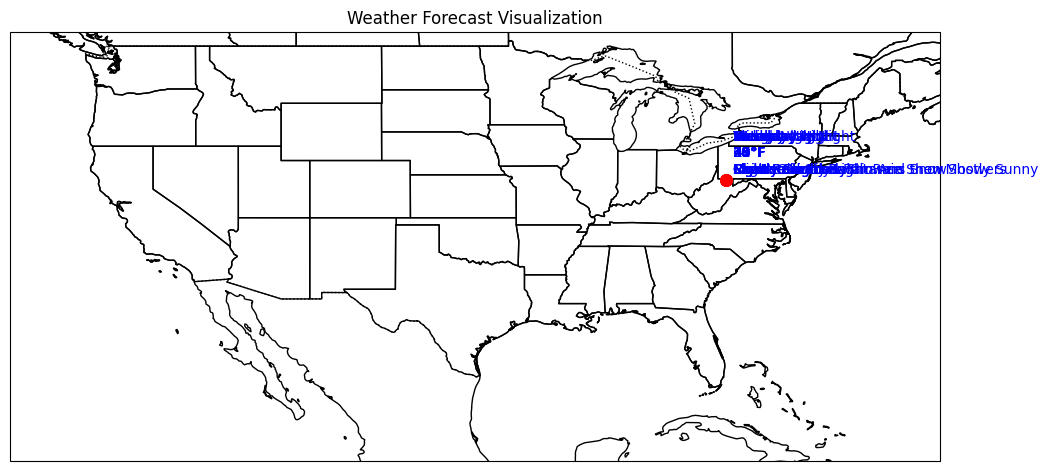

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    # Get the forecast office and grid information
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    # Extract the forecast URL
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_coordinates(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'start_time': period['startTime']
        })
    return forecasts

def plot_weather_on_map(forecasts):
    """Plot weather data on a map using Cartopy."""
    # Set up the map
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot each forecast as a point on the map
    for forecast in forecasts:
        ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
        ax.text(
            forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
            f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
            transform=ccrs.PlateCarree(),
            fontsize=10,
            color='blue'
        )
    
    # Title and display the map
    plt.title("Weather Forecast Visualization")
    plt.show()

def main():
    """Main function to get weather data for a user-specified location and plot it."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_coordinates(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Plot weather data on a map
        plot_weather_on_map(forecasts)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Retrieved weather data for Morgantown, WV.


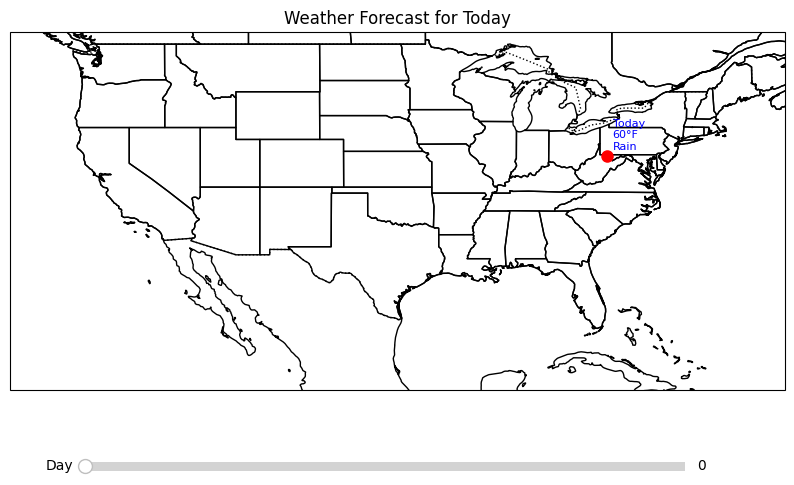

In [10]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_coordinates(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'start_time': period['startTime']
        })
    return forecasts

def plot_forecast_map(ax, forecast):
    """Plot a single forecast on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast for {forecast['name']}")

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_coordinates(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.2)  # Space for slider

        # Initial plot
        current_index = 0
        plot_forecast_map(ax, forecasts[current_index])

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            plot_forecast_map(ax, forecasts[index])
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Retrieved weather data for Morgantown, WV.


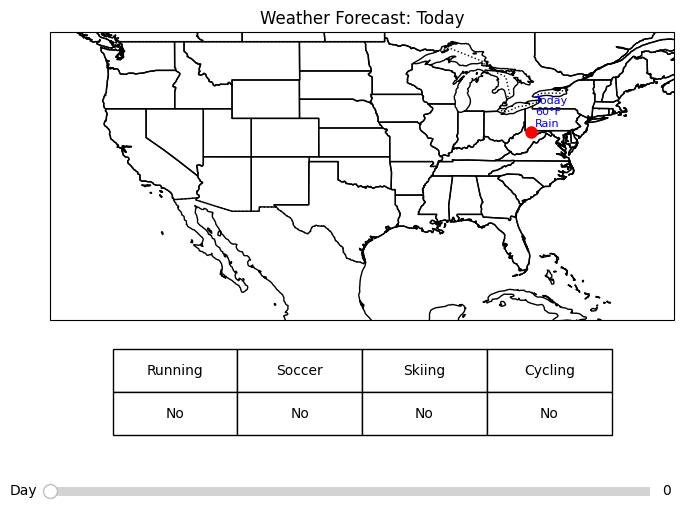

In [11]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests
import pandas as pd

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_data(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'wind_speed': period['windSpeed'],
            'start_time': period['startTime']
        })
    return forecasts

def assess_sports_suitability(forecast):
    """Assess sports suitability based on weather conditions."""
    temperature = forecast['temperature']
    wind_speed = int(forecast['wind_speed'].split()[0]) if forecast['wind_speed'] else 0
    short_forecast = forecast['forecast'].lower()
    
    sports = {
        "Running": 50 <= temperature <= 70 and wind_speed <= 15 and "rain" not in short_forecast,
        "Soccer": temperature >= 40 and wind_speed <= 20 and "rain" not in short_forecast,
        "Skiing": temperature <= 32 and "snow" in short_forecast,
        "Cycling": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
    }
    
    return {sport: "Yes" if suitable else "No" for sport, suitable in sports.items()}

def plot_forecast_with_sports(ax, forecast, sports_table):
    """Plot forecast and sports suitability on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast: {forecast['name']}")

    # Display sports suitability table
    ax.table(
        cellText=sports_table.values,
        colLabels=sports_table.columns,
        loc='bottom',
        cellLoc='center',
        bbox=[0.1, -0.4, 0.8, 0.3]
    )

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_data(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.4)  # Space for slider and table

        # Initial plot
        current_index = 0
        current_sports = assess_sports_suitability(forecasts[current_index])
        sports_table = pd.DataFrame([current_sports])
        plot_forecast_with_sports(ax, forecasts[current_index], sports_table)

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            updated_sports = assess_sports_suitability(forecasts[index])
            updated_table = pd.DataFrame([updated_sports])
            plot_forecast_with_sports(ax, forecasts[index], updated_table)
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Enter city:  Morgantown
Enter state:  WV


Geolocation of Morgantown, WV: (39.6296809, -79.9559437)
Retrieved weather data for Morgantown, WV.


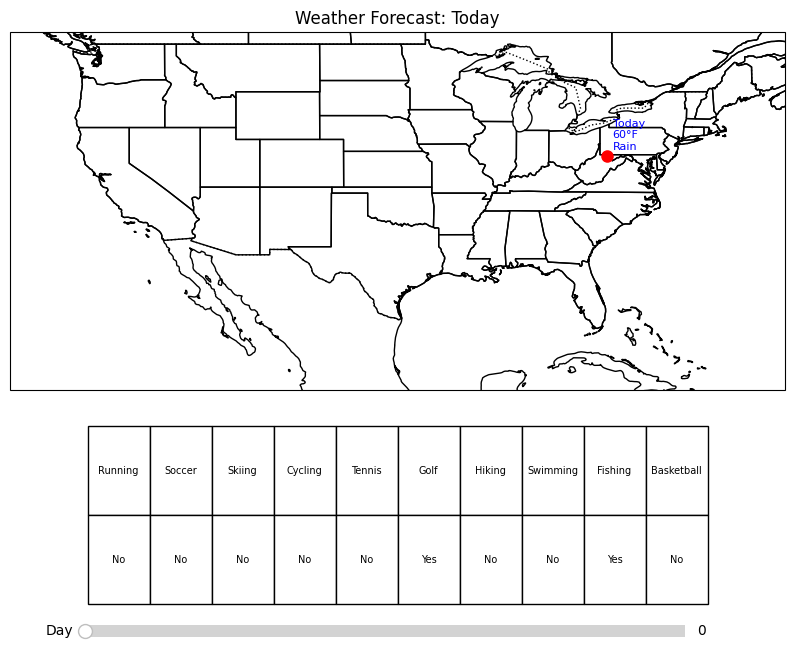

In [12]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
import requests
import pandas as pd

def get_geolocation(city, state):
    """Get the geolocation (latitude and longitude) for a given city and state."""
    geolocator = Nominatim(user_agent="weather_app")
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        raise ValueError("Location not found.")

def get_weather_data(latitude, longitude):
    """Fetch weather data from NOAA's National Weather Service API."""
    headers = {
        'User-Agent': 'YourAppName (your.email@example.com)'  # Replace with your app and contact info
    }
    points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
    response = requests.get(points_url, headers=headers)
    response.raise_for_status()
    data = response.json()
    
    forecast_url = data['properties']['forecast']
    forecast_response = requests.get(forecast_url, headers=headers)
    forecast_response.raise_for_status()
    forecast_data = forecast_response.json()
    
    return forecast_data

def extract_forecast_data(forecast_data, latitude, longitude):
    """Extract relevant forecast data including the location."""
    forecasts = []
    for period in forecast_data['properties']['periods']:
        forecasts.append({
            'name': period['name'],
            'latitude': latitude,
            'longitude': longitude,
            'temperature': period['temperature'],
            'forecast': period['shortForecast'],
            'wind_speed': period['windSpeed'],
            'start_time': period['startTime']
        })
    return forecasts

def assess_sports_suitability(forecast):
    """Assess suitability for 10 sports based on weather conditions."""
    temperature = forecast['temperature']
    wind_speed = int(forecast['wind_speed'].split()[0]) if forecast['wind_speed'] else 0
    short_forecast = forecast['forecast'].lower()
    
    sports = {
        "Running": 50 <= temperature <= 70 and wind_speed <= 15 and "rain" not in short_forecast,
        "Soccer": temperature >= 40 and wind_speed <= 20 and "rain" not in short_forecast,
        "Skiing": temperature <= 32 and "snow" in short_forecast,
        "Cycling": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
        "Tennis": 50 <= temperature <= 90 and wind_speed <= 15 and "rain" not in short_forecast,
        "Golf": 50 <= temperature <= 80 and wind_speed <= 20,
        "Hiking": 50 <= temperature <= 80 and wind_speed <= 15 and "rain" not in short_forecast,
        "Swimming": temperature > 70 and "rain" not in short_forecast,
        "Fishing": wind_speed <= 15,  # Any temperature is fine for fishing
        "Basketball": wind_speed <= 20 and "rain" not in short_forecast,  # Can be indoors if needed
    }
    
    return {sport: "Yes" if suitable else "No" for sport, suitable in sports.items()}

def plot_forecast_with_sports(ax, forecast, sports_table):
    """Plot forecast and sports suitability on the map."""
    ax.clear()
    ax.set_extent([-130, -65, 20, 50], crs=ccrs.PlateCarree())  # USA bounds
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot the forecast
    ax.plot(forecast['longitude'], forecast['latitude'], marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(
        forecast['longitude'] + 0.5, forecast['latitude'] + 0.5,
        f"{forecast['name']}\n{forecast['temperature']}°F\n{forecast['forecast']}",
        transform=ccrs.PlateCarree(),
        fontsize=8,
        color='blue'
    )
    ax.set_title(f"Weather Forecast: {forecast['name']}")

    # Display sports suitability table
    ax.table(
        cellText=sports_table.values,
        colLabels=sports_table.columns,
        loc='bottom',
        cellLoc='center',
        bbox=[0.1, -0.6, 0.8, 0.5]
    )

def main():
    """Main function to get weather data for a user-specified location and create interactive map."""
    city = input("Enter city: ")
    state = input("Enter state: ")
    
    try:
        # Get geolocation
        latitude, longitude = get_geolocation(city, state)
        print(f"Geolocation of {city}, {state}: ({latitude}, {longitude})")
        
        # Get weather data
        forecast_data = get_weather_data(latitude, longitude)
        
        # Extract forecast details
        forecasts = extract_forecast_data(forecast_data, latitude, longitude)
        print(f"Retrieved weather data for {city}, {state}.")
        
        # Interactive map setup
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
        plt.subplots_adjust(bottom=0.4)  # Space for slider and table

        # Initial plot
        current_index = 0
        current_sports = assess_sports_suitability(forecasts[current_index])
        sports_table = pd.DataFrame([current_sports])
        plot_forecast_with_sports(ax, forecasts[current_index], sports_table)

        # Add slider
        ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of slider
        slider = Slider(ax_slider, 'Day', 0, len(forecasts) - 1, valinit=0, valstep=1)

        # Update function for slider
        def update(val):
            index = int(slider.val)
            updated_sports = assess_sports_suitability(forecasts[index])
            updated_table = pd.DataFrame([updated_sports])
            plot_forecast_with_sports(ax, forecasts[index], updated_table)
            fig.canvas.draw_idle()

        slider.on_changed(update)
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


In [ ]:
Sport	Weather Conditions
Running	50°F–70°F, low wind, no rain
Soccer	>40°F, moderate wind, no rain
Skiing	<=32°F, snow required
Cycling	50°F–80°F, low wind, no rain
Tennis	50°F–90°F, low wind, no rain
Golf	50°F–80°F, low wind
Hiking	50°F–80°F, low wind, no rain
Swimming	>70°F, no rain
Fishing	Any temperature, low wind
Basketball	Any temperature, low wind, no heavy rain (can also be played indoors in most conditions)